## Sales Prediction

In [22]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set3')

import warnings
warnings.filterwarnings('ignore')

In [23]:
#set the warning filter
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#Load dataset
df = pd.read_csv(r'C:\Users\USER\Documents\Advertising analysis\advertising.csv', encoding= 'unicode_escape')

## Exploratory Data Analysis

In [24]:
# Showing first 5 rows
df.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# Get the column names of the dataset
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [26]:
# Showing last 5 rows
df.tail()

,Index,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
# To rename the column 'Unnamed: 0' to 'Index'
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [8]:
# Get the shape of the dataset (rows, columns)
df.shape

(200, 5)

In [9]:
# Check information about the dataset, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [27]:
# checking for data types
df.dtypes

Index          int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [29]:
# Checking for duplicated values
df.duplicated().sum() # no duplicate values found

0

In [30]:
# Checking for null values
df.isna().sum() # no null values found

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [31]:
# Checking for unique values
df.nunique()

Index        200
TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [32]:
# Showing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [33]:
# Showing statistical info. about numerical columns
df.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Data Visualization

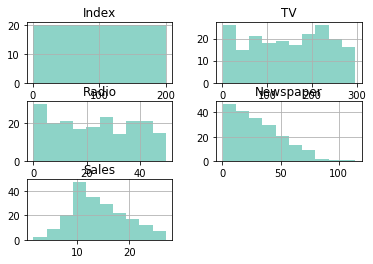

In [34]:
# Plotting HistPlot
df.hist()
plt.show()

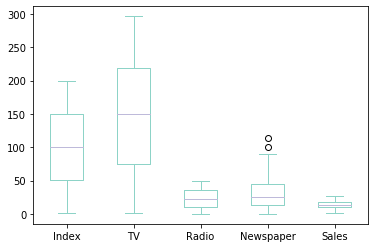

In [35]:
# Plotting box plot and checking for outliers
df.plot(kind='box')
plt.show()
# There are no considerable outliers present in the data.

In [36]:

# Correlation between different features
df.corr()

,Index,TV,Radio,Newspaper,Sales
Index,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


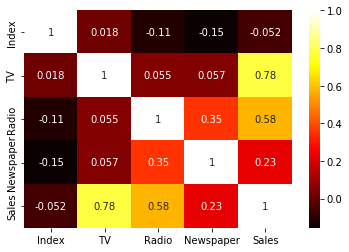

In [38]:
# Plotting Correlation Plot
sns.heatmap(df.corr(),annot=True,cmap='hot')
plt.show()

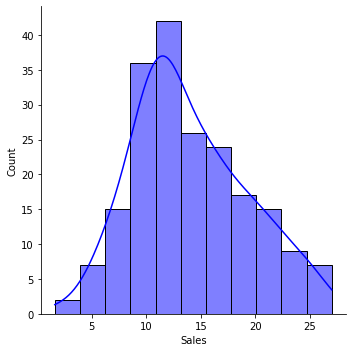

In [39]:
# Showing Frequency Distribution of Target Variable
sns.displot(df['Sales'],kde=True,color='b')
plt.show()

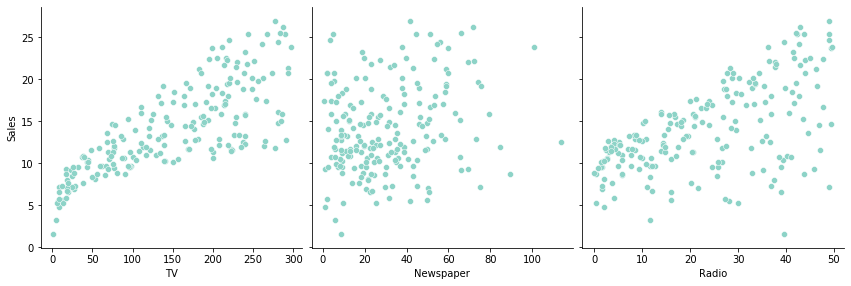

In [42]:
# Showing how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars = ['TV', 'Newspaper', 'Radio'], y_vars = 'Sales', height=4, aspect=1, kind='scatter')
plt.show()

## Selecting independent and the dependent features from the dataset

In [43]:
x = df.drop('Sales',axis=1) # x denotes independent features
y = df['Sales']             # y denotes dependent variable
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(200, 4)
(200,)


## Splitting data into training and test data

In [44]:
print(0.25*200)

50.0


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(type(x_train))
print(type(y_train))

(150, 4)
(50, 4)
(150,)
(50,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Standardization of Data

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-0.07600863,  0.12193673,  0.5453944 ,  1.08613993],
       [-1.4373572 ,  0.50040985,  1.62909318,  1.08613993],
       [-1.18210434,  1.64997774,  0.32326981,  0.61668278],
       [ 0.99605337, -1.66549396,  0.90213996,  0.71347807],
       [ 0.48554766,  0.7939918 ,  1.7165968 , -1.31922298],
       [ 0.26432851, -0.91798007,  0.77425005,  1.0764604 ],
       [-0.51844691,  0.75272526,  1.37331334, -0.15767952],
       [ 1.20025566, -1.21392011, -0.80081525, -0.58357879],
       [ 1.26832308,  0.81875173, -1.35276121, -0.84008631],
       [-0.92685148,  0.26106392, -0.06713099,  0.05043035],
       [-0.56949748, -1.43204325,  0.07422103, -1.36762063],
       [ 1.40445794, -1.14081938, -1.1979471 , -0.03668541],
       [ 1.11517137,  0.96141605, -1.35276121,  2.63002478],
       [-0.3652952 , -1.73977373,  0.43096658, -1.01915759],
       [ 1.47252537, -0.15867574, -1.44026484, -0.18671811],
       [ 1.31937366,  0.20329076, -1.05659508,  0.22950163],
       [-0.73966606, -1.

## Creating functions to evaluate the Regression Evaluation Metrics, Model Score

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
def reg_eval_metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)


def mscore(model):
    print('Training Score',model.score(x_train,y_train)) # Trainng R2 score
    print('Testing Score',model.score(x_test,y_test))    # Test R2 Score

## Importing the ML Regression libraries

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Building the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Computing Training and Testing score
mscore(lin_reg)

Training Score 0.8967178221746831
Testing Score 0.8926247034500233


In [54]:
# Generating Prediction
ypred_lr = lin_reg.predict(x_test)
ypred_lr

array([16.38744409, 20.86731254, 21.56559474, 10.54088059, 22.18970426,
       13.04623435, 21.0787109 ,  7.36830505, 13.61800996, 15.08108548,
        8.89070208,  6.56218469, 14.36841551,  8.74976106,  9.65124749,
       12.1553164 ,  8.56730146, 16.28793736, 10.15712629, 18.82685441,
       19.61267327, 13.12290918, 12.28262431, 21.35987452,  7.66034978,
        5.61403015, 20.78702192, 11.87810313,  9.08396305,  8.38914076,
       12.33574712,  9.82838137, 21.40286776, 12.14374124, 18.32781855,
       20.17611868, 14.01360947, 20.93760261, 10.97248876,  4.366457  ,
        9.56413029, 12.68331032,  9.89365313,  8.00691535, 13.46681099,
        5.32540844,  9.10391408, 14.03047466,  8.74482786, 11.53639151])

In [55]:
# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_lr)

MAE: 1.4082743919668723
MSE: 2.904139272675717
RMSE: 1.7041535355347877


In [56]:
# Evaluating Model : R2 score
r2_lr = r2_score(y_test,ypred_lr)
r2_lr

0.8926247034500233

In [57]:
# Building the knn Regressor Model
knn = KNeighborsRegressor(n_neighbors=10)  # K=15 (number of nearest neighbors)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [58]:
# Computing Training and Testing score
mscore(knn)

Training Score 0.7581448849130475
Testing Score 0.7778297210032573


In [59]:
# Generating Prediction
ypred_knn = knn.predict(x_test)
ypred_knn

array([16.49, 18.95, 19.19,  7.75, 18.68, 13.28, 19.65,  8.92, 15.92,
       16.31,  8.36,  9.45, 18.35,  6.84, 12.59, 14.06,  7.81, 16.39,
       11.98, 18.57, 18.29,  9.81,  7.79, 18.64, 11.26,  9.91, 18.74,
       13.12, 11.18,  6.87, 15.21, 10.53, 19.05,  8.46, 17.36, 16.18,
        8.82, 20.64, 11.89,  8.58, 12.49, 14.85,  9.79, 10.53, 16.19,
        8.15, 10.65, 13.91, 11.26, 11.99])

In [60]:
# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_knn)

MAE: 1.8403999999999998
MSE: 6.008955999999996
RMSE: 2.4513171969371887


In [61]:
# Evaluating Model : R2 score
r2_knn = r2_score(y_test,ypred_knn)
r2_knn

0.7778297210032573

In [62]:
# Building the RandomForest Regressor Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [63]:
# Computing Training and Testing score
mscore(rf)

Training Score 0.9952385266416534
Testing Score 0.9771618675957489


In [64]:
# Generating Prediction
ypred_rf = rf.predict(x_test)
ypred_rf

array([17.566, 21.49 , 20.103,  6.647, 23.156, 12.797, 22.671,  9.853,
       12.082, 15.965,  7.931,  9.421, 12.194,  5.329, 10.581, 12.592,
        6.742, 16.551, 11.287, 19.365, 19.877, 13.008, 10.847, 21.827,
       10.025,  9.154, 22.52 , 12.427, 10.259,  5.436, 11.563, 11.03 ,
       22.027,  7.937, 14.985, 20.219, 12.602, 20.578, 12.291,  7.645,
       11.275, 12.959, 10.172,  9.923, 11.787,  9.308, 10.991, 15.352,
       10.73 , 11.624])

In [65]:
# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_rf)

MAE: 0.6355800000000008
MSE: 0.6176943800000008
RMSE: 0.7859353535755983


In [66]:
# Evaluating Model : R2 score
r2_rf = r2_score(y_test,ypred_rf)
r2_rf

0.9771618675957487

## Creating a dataframe showing R2_score of each model

In [67]:
# Creating a dataframe showing R2_score of each model
models = pd.DataFrame({
    'Model': ['Linear Regression','Knn Regressor','RandomForest Regressor'],
    'Score': [r2_lr,r2_knn,r2_rf]})
models

,Model,Score
0,Linear Regression,0.892625
1,Knn Regressor,0.777830
2,RandomForest Regressor,0.977162


## Plotting R2_score of each model on a bar graph

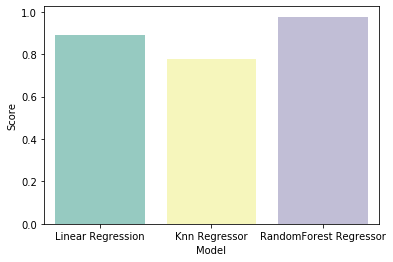

In [68]:
# plotting R2_score of each model on a bar graph
sns.barplot(x=models['Model'],y=models['Score'])
plt.show()

## Sales Prediction on New dataset

In [69]:
test = np.array([[140,65,97],[76,34,87],[45,78,53],[230,95,79],[206,148,94]])
test

array([[140,  65,  97],
       [ 76,  34,  87],
       [ 45,  78,  53],
       [230,  95,  79],
       [206, 148,  94]])

In [70]:
# Creating a new dataset
new_df = pd.DataFrame(test, columns=['TV','Radio','Newspaper'])
new_df

,TV,Radio,Newspaper
0,140,65,97
1,76,34,87
2,45,78,53
3,230,95,79
4,206,148,94
